In [1]:
# NBVAL_IGNORE_OUTPUT
# ^this is a magic comment to work around this issue https://github.com/ebmdatalab/custom-docker/issues/10
import pandas as pd
from change_detection import functions as chg
from lib.regression import rd

In [2]:
change = chg.ChangeDetection('practice_data%',
                                    measure=True,
                                    direction='down',
                                    use_cache=True,
                                    overwrite=False,
                                    verbose=False,
                                    draw_figures='no',
                                    measure_folder='alex')
change.run()

In [3]:
change.get_measure_list()

0     practice_data_desogestrel
1    practice_data_trimethoprim
Name: table_id, dtype: object

In [4]:
changes = change.concatenate_outputs()
changes.head()

is.nbreak  is.tfirst  is.tfirst.pknown  \
measure                   name                                             
practice_data_desogestrel A81001          2       46.0              46.0   
                          A81002          2       42.0              42.0   
                          A81003          1       41.0              41.0   
                          A81004          3       40.0              40.0   
                          A81005          1       40.0              40.0   

                                  is.tfirst.pknown.offs  is.tfirst.offs  \
measure                   name                                            
practice_data_desogestrel A81001                   46.0            46.0   
                          A81002                   42.0            42.0   
                          A81003                   41.0            41.0   
                          A81004                   40.0            40.0   
                          A81005                   40.0            40.0   

                                  is.tfirst.big  is.slope.ma  \
measure                   name                                 
practice_data_desogestrel A81001           46.0    -0.081600   
                          A81002           42.0    -0.478759   
                          A81003           41.0    -0.036546   
                          A81004           40.0    -0.096405   
                          A81005           40.0    -0.034794   

                                  is.slope.ma.prop  is.slope.ma.prop.lev  \
measure                   name                                             
practice_data_desogestrel A81001         -0.090631              0.562657   
                          A81002         -2.844392              0.839145   
                          A81003         -0.040380              0.520000   
                          A81004         -0.110674              0.522166   
                          A81005         -0.036432              0.538462   

                                  is.intlev.initlev  is.intlev.finallev  \
measure                   name                                            
practice_data_desogestrel A81001           0.981948            0.401846   
                          A81002           0.647076            0.076544   
                          A81003           0.941602            0.064500   
                          A81004           0.967481            0.044352   
                          A81005           0.989830            0.085181   

                                  is.intlev.levd  is.intlev.levdprop  
measure                   name                                        
practice_data_desogestrel A81001        0.580102            0.590767  
                          A81002        0.570532            0.881708  
                          A81003        0.877102            0.931500  
                          A81004        0.923130            0.954158  
                          A81005        0.904649            0.913944

In [5]:
change.num_cores = 1
change.national_changes()

In [6]:
changes_nat = change.concatenate_outputs('_national')
changes_nat = changes_nat.reset_index(level=1)
changes_nat

,name,is.nbreak,is.tfirst,is.tfirst.pknown,is.tfirst.pknown.offs,is.tfirst.offs,is.tfirst.big,is.slope.ma,is.slope.ma.prop,is.slope.ma.prop.lev,is.intlev.initlev,is.intlev.finallev,is.intlev.levd,is.intlev.levdprop
measure,,,,,,,,,,,,,,
practice_data_desogestrel,data.pick...pick.rel.,8,13,13,13,13,33,-0.024038,-0.032174,0.510463,0.751651,0.186560,0.565090,0.751800
practice_data_trimethoprim,data.pick...pick.rel.,5,16,16,16,16,47,-0.015054,-0.023354,0.509108,0.648213,0.322958,0.325254,0.501771


In [7]:
difference = changes - changes_nat
difference.head()

is.intlev.finallev  is.intlev.initlev  \
measure                   name                                            
practice_data_desogestrel A81001            0.215286           0.230298   
                          A81002           -0.110016          -0.104575   
                          A81003           -0.122060           0.189951   
                          A81004           -0.142208           0.215831   
                          A81005           -0.101379           0.238179   

                                  is.intlev.levd  is.intlev.levdprop  \
measure                   name                                         
practice_data_desogestrel A81001        0.015012           -0.161033   
                          A81002        0.005441            0.129908   
                          A81003        0.312011            0.179700   
                          A81004        0.358039            0.202358   
                          A81005        0.339559            0.162145   

                                  is.nbreak  is.slope.ma  is.slope.ma.prop  \
measure                   name                                               
practice_data_desogestrel A81001         -6    -0.057562         -0.058457   
                          A81002         -6    -0.454721         -2.812218   
                          A81003         -7    -0.012508         -0.008206   
                          A81004         -5    -0.072367         -0.078500   
                          A81005         -7    -0.010756         -0.004259   

                                  is.slope.ma.prop.lev  is.tfirst  \
measure                   name                                      
practice_data_desogestrel A81001              0.052194       33.0   
                          A81002              0.328682       29.0   
                          A81003              0.009537       28.0   
                          A81004              0.011703       27.0   
                          A81005              0.027998       27.0   

                                  is.tfirst.big  is.tfirst.offs  \
measure                   name                                    
practice_data_desogestrel A81001           13.0            33.0   
                          A81002            9.0            29.0   
                          A81003            8.0            28.0   
                          A81004            7.0            27.0   
                          A81005            7.0            27.0   

                                  is.tfirst.pknown  is.tfirst.pknown.offs name  
measure                   name                                                  
practice_data_desogestrel A81001              33.0                   33.0  NaN  
                          A81002              29.0                   29.0  NaN  
                          A81003              28.0                   28.0  NaN  
                          A81004              27.0                   27.0  NaN  
                          A81005              27.0                   27.0  NaN

In [8]:
reg_data = rd.get_data()
reg_data.head()

,TOTAL_PATIENTS,TOTAL_DISP_PATIENTS,TOTAL_GP_HC,TOTAL_GP_FTE,SINGLE_HANDED,DISPENSING_BIN,GP_FTE_PER_10000,list_size,Deprivation score (IMD 2015),% who have a positive experience of their GP practice,...,pct,total_items,CL,PH,PHAS,QOF_TOTAL,Principal_Supplier,LSOA11NM,ruc11cd,RUC11
code,,,,,,,,,,,,,,,,,,,,,
A81001,4103.0,0.0,3.0,3.066667,0.0,0.0,7.474206,4097.083333,29.140310,81.489722,...,00K,94138.0,430.16,96.46,25.92,552.54,TPP,Stockton-on-Tees 014G,C,Urban city and town
A81002,19357.0,0.0,13.0,11.706667,0.0,0.0,6.047769,19829.750000,29.689706,85.932369,...,00K,451497.0,432.74,97.00,27.00,556.74,TPP,Stockton-on-Tees 014F,C,Urban city and town
A81003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00K,NaN,NaN,NaN,NaN,NaN,NaN,Hartlepool 007D,C,Urban city and town
A81004,10941.0,0.0,4.0,3.186667,0.0,0.0,2.912592,10307.333333,34.411828,94.128403,...,00M,214788.0,431.60,97.00,27.00,555.60,TPP,Middlesbrough 015C,C,Urban city and town
A81005,8072.0,0.0,10.0,8.076800,0.0,0.0,10.005946,8020.416667,15.743812,92.121005,...,00M,195485.0,430.97,96.67,27.00,554.64,TPP,Redcar and Cleveland 018A,C,Urban city and town


In [9]:
biggest_change = difference[['is.tfirst.big']].groupby(level=1).sum()
data_for_stata = biggest_change.join(reg_data,how='left')
data_for_stata.to_csv('../lib/regression/data/data_for_stata.csv')
data_for_stata.head()

,is.tfirst.big,TOTAL_PATIENTS,TOTAL_DISP_PATIENTS,TOTAL_GP_HC,TOTAL_GP_FTE,SINGLE_HANDED,DISPENSING_BIN,GP_FTE_PER_10000,list_size,Deprivation score (IMD 2015),...,pct,total_items,CL,PH,PHAS,QOF_TOTAL,Principal_Supplier,LSOA11NM,ruc11cd,RUC11
A81001,11.0,4103.0,0.0,3.0,3.066667,0.0,0.0,7.474206,4097.083333,29.140310,...,00K,94138.0,430.16,96.46,25.92,552.54,TPP,Stockton-on-Tees 014G,C,Urban city and town
A81002,11.0,19357.0,0.0,13.0,11.706667,0.0,0.0,6.047769,19829.750000,29.689706,...,00K,451497.0,432.74,97.00,27.00,556.74,TPP,Stockton-on-Tees 014F,C,Urban city and town
A81003,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00K,NaN,NaN,NaN,NaN,NaN,NaN,Hartlepool 007D,C,Urban city and town
A81004,8.0,10941.0,0.0,4.0,3.186667,0.0,0.0,2.912592,10307.333333,34.411828,...,00M,214788.0,431.60,97.00,27.00,555.60,TPP,Middlesbrough 015C,C,Urban city and town
A81005,7.0,8072.0,0.0,10.0,8.076800,0.0,0.0,10.005946,8020.416667,15.743812,...,00M,195485.0,430.97,96.67,27.00,554.64,TPP,Redcar and Cleveland 018A,C,Urban city and town


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d4ea055e0>]],
      dtype=object)

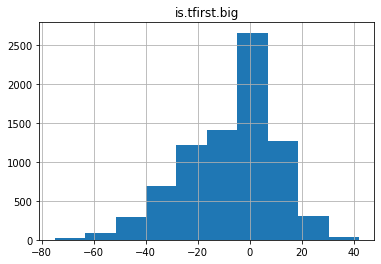

In [10]:
biggest_change.hist()

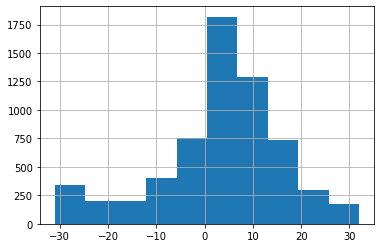

In [11]:
difference.loc['practice_data_desogestrel','is.tfirst.big'].hist()

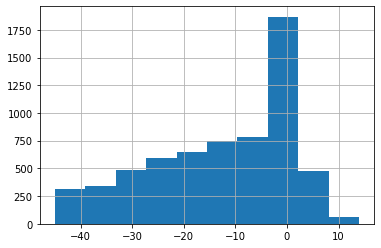

In [12]:
difference.loc['practice_data_trimethoprim','is.tfirst.big'].hist()

In [13]:
difference.loc['practice_data_trimethoprim','is.slope.ma.prop'].describe()

count    6287.000000
mean            -inf
std              NaN
min             -inf
25%        -0.100964
50%        -0.014245
75%         0.005162
max        10.234681
Name: is.slope.ma.prop, dtype: float64

In [14]:
difference.loc['practice_data_trimethoprim','is.intlev.levdprop'].describe()

count    6.308000e+03
mean    -5.248639e+08
std      4.168622e+10
min     -3.310841e+12
25%     -5.814295e-02
50%      7.000658e-02
75%      1.795608e-01
max      4.982290e-01
Name: is.intlev.levdprop, dtype: float64